In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the Boston Housing Price Prediction dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('/content/drive/MyDrive/College/DL/Assignment1/housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [6]:
#First look at the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
print(boston.shape)

(506, 14)


In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<ipython-input-11-140095ed2b7b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston.MEDV)


<Axes: xlabel='MEDV', ylabel='Density'>

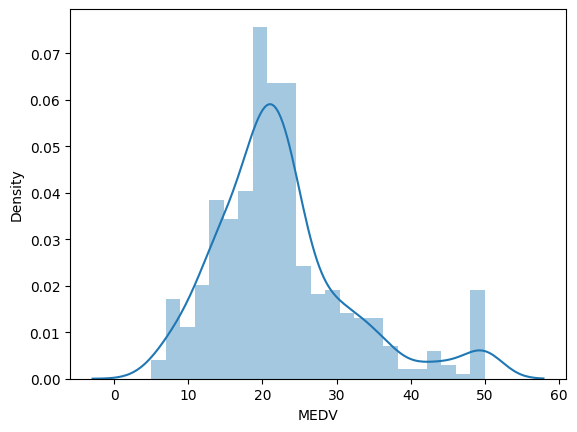

In [11]:
#visualiation

import seaborn as sns
sns.distplot(boston.MEDV)

<Axes: >

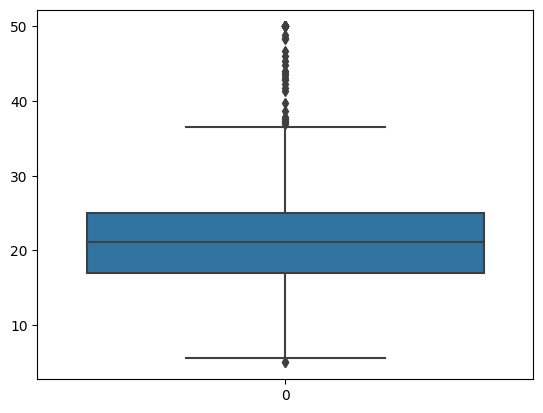

In [12]:
sns.boxplot(boston.MEDV)

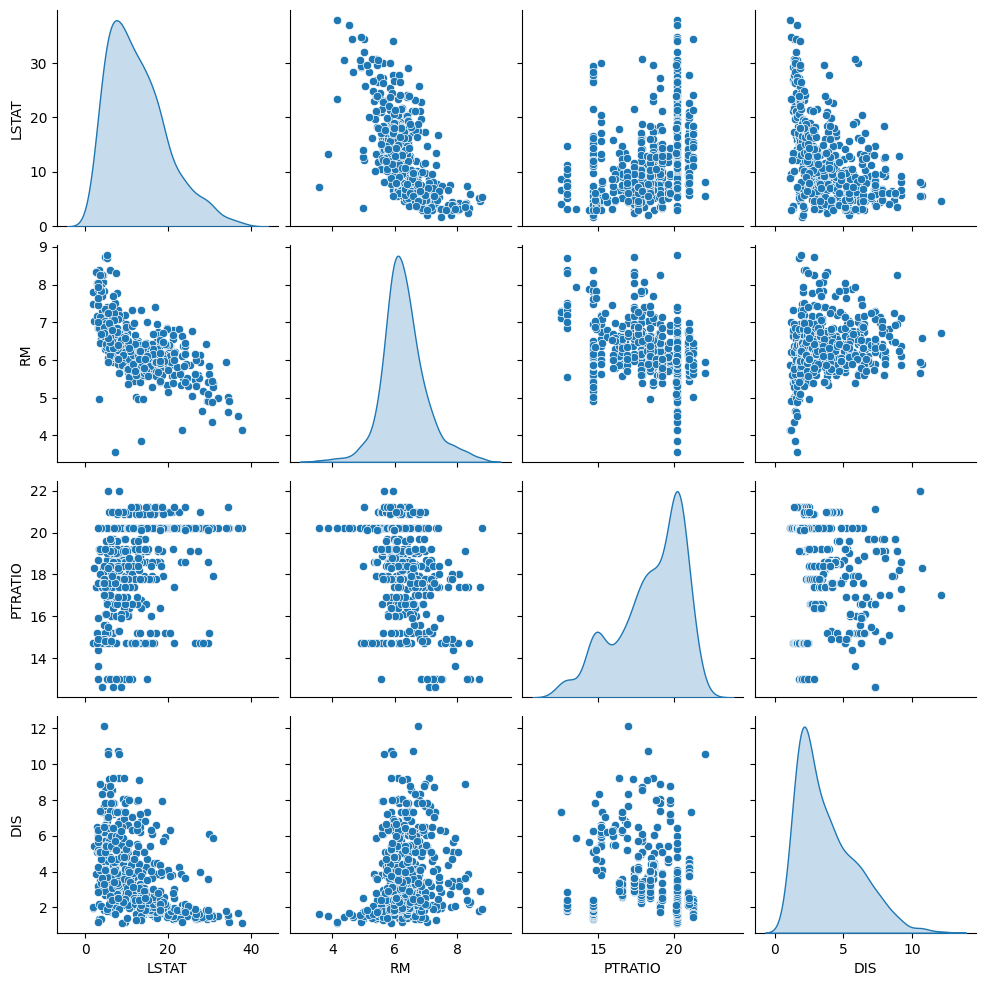

In [81]:
sns.pairplot(boston[['LSTAT', 'RM', 'PTRATIO', 'DIS']], diag_kind='kde')

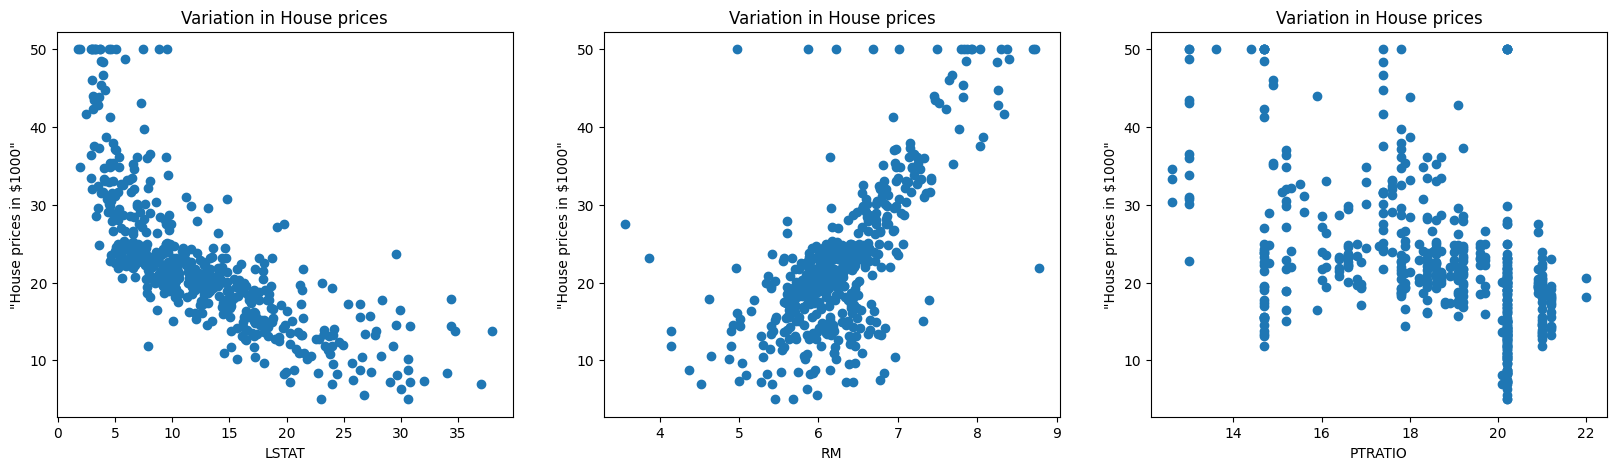

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = boston.MEDV
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [42]:
#Splitting the dependent feature and independent feature
X = boston.iloc[:, :-1].values
y = boston.iloc[:, -1].values

In [43]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(404, 13)

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [74]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')


In [75]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 3812.7354
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 377.6758
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 203.3144
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 154.7275
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 102.9788
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 89.7250
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 95.9262
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 86.5739
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 89.0356
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 87.7416
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 81.9493
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 82.1604
Epoch 13/100
13/13 

In [76]:
# Evaluate the performance of the model on the test data
mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Mean Squared Error: {mse:0.3f}')

Test Mean Squared Error: 19.202


In [77]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [78]:
y_pred

array([[24.482592],
       [36.937107],
       [18.263535],
       [22.964512],
       [14.806615],
       [17.506329],
       [17.143162],
       [15.772647],
       [18.607769],
       [18.300596],
       [18.655247],
       [17.559498],
       [ 8.034591],
       [18.387268],
       [18.575077],
       [19.837511],
       [17.454777],
       [ 9.740345],
       [40.118538],
       [13.804941],
       [24.5966  ],
       [24.535282],
       [15.005153],
       [19.481842],
       [16.115498],
       [13.797492],
       [20.470371],
       [ 9.566329],
       [18.406143],
       [18.403687],
       [18.930416],
       [22.35712 ],
       [17.952679],
       [23.689415],
       [13.841912],
       [10.710184],
       [31.107286],
       [21.546028],
       [17.991531],
       [21.202375],
       [16.594753],
       [30.331694],
       [42.286777],
       [19.03263 ],
       [22.168297],
       [14.443524],
       [15.512124],
       [22.03599 ],
       [15.451068],
       [32.244106],


In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.73814958549893


In [80]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

4.382063614036445
